<a href="https://colab.research.google.com/github/AndresRivasGtz/Examen2Micro/blob/main/Parcial2/Parcial2-SegundaParte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importar el modelo de interes
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [4]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/EntrenamientoIA/train"
test_dir = "/content/drive/MyDrive/EntrenamientoIA/test"

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 100 images belonging to 10 classes.
Testing images:
Found 100 images belonging to 10 classes.


In [5]:
IMAGE_SIZE+(3,)

(224, 224, 3)

In [6]:
#model = Sequential()
#model.add(Conv2D( 128, (3, 3), strides=(1,1), activation='relu', input_shape=(224,224,3) ))
#model.add(Conv2D( 64, (4, 4), strides=(1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(64, (5, 5), strides=(2,2), activation='relu'))
#model.add(Conv2D(32, (4, 4), strides=(2,2), activation='relu'))
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Dropout(0.5))
#model.add(Flatten())
#model.add(Dense(110, activation='relu'))
#model.add(Dense(120, activation='relu'))
#model.add(Dense(100, activation='softmax'))
#model.add(Dense(10, activation='softmax'))

In [7]:
model = Sequential()
model.add(Conv2D( 200, (4, 4), strides=(4,4), activation='relu', input_shape=(224,224,3) ))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Conv2D( 300, (3, 3), strides=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 200)       9800      
                                                                 
 dropout (Dropout)           (None, 56, 56, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 300)       540300    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 300)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 86700)             0

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics='accuracy')

In [10]:
history=model.fit(train_data, validation_data=test_data, epochs=250, batch_size=100)

Epoch 1/250
4/4 [==============================] - 41s 7s/step - loss: 2.5080 - accuracy: 0.0700 - val_loss: 2.5580 - val_accuracy: 0.1000
Epoch 2/250
4/4 [==============================] - 4s 1s/step - loss: 2.4183 - accuracy: 0.1000 - val_loss: 2.3540 - val_accuracy: 0.1000
Epoch 3/250
4/4 [==============================] - 5s 2s/step - loss: 2.3225 - accuracy: 0.1200 - val_loss: 2.2597 - val_accuracy: 0.1000
Epoch 4/250
4/4 [==============================] - 4s 1s/step - loss: 2.3677 - accuracy: 0.0600 - val_loss: 2.2702 - val_accuracy: 0.1400
Epoch 5/250
4/4 [==============================] - 5s 1s/step - loss: 2.3065 - accuracy: 0.1100 - val_loss: 2.2735 - val_accuracy: 0.1700
Epoch 6/250
4/4 [==============================] - 4s 1s/step - loss: 2.4704 - accuracy: 0.1100 - val_loss: 2.2372 - val_accuracy: 0.1600
Epoch 7/250
4/4 [==============================] - 5s 1s/step - loss: 2.2880 - accuracy: 0.1500 - val_loss: 2.2353 - val_accuracy: 0.1500
Epoch 8/250
4/4 [================

<function matplotlib.pyplot.show(close=None, block=None)>

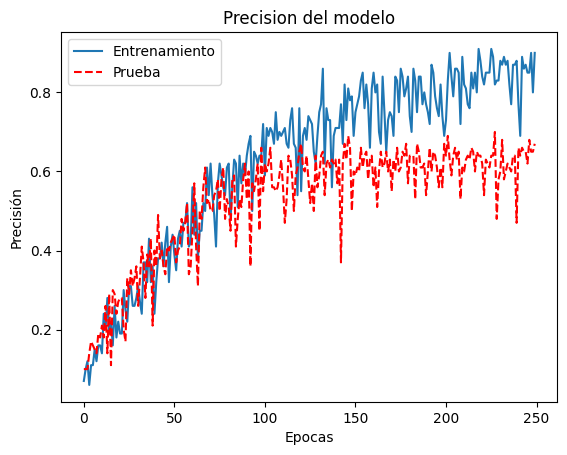

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Precision del modelo')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

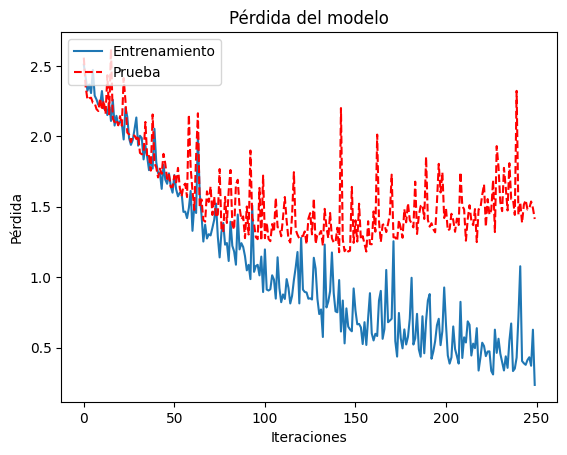

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'r--')
plt.title('Pérdida del modelo')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show